In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from daq import query_devices, playrec
from qcodes.instrument_drivers.stanford_research import SR860

lockin = SR860('lockin',"USB0::0xB506::0x2000::002765::INSTR")

Connected to: Stanford_Research_Systems SR865 (serial:002765, firmware:v1.51) in 0.08s


In [2]:
lockin.input_config('a')
lockin.buffer.capture_config('X,Y')
# lockin.buffer.set_capture_rate_to_maximum()
lockin.buffer.capture_rate(305)
sample_count = 150
lockin.buffer.set_capture_length_to_fit_samples(sample_count)

In [3]:
query_devices()

Device Name: Dev1, Product Type: USB-6343 (BNC)
Input channels: ['Dev1/ai0', 'Dev1/ai1', 'Dev1/ai2', 'Dev1/ai3', 'Dev1/ai4', 'Dev1/ai5', 'Dev1/ai6', 'Dev1/ai7', 'Dev1/ai8', 'Dev1/ai9', 'Dev1/ai10', 'Dev1/ai11', 'Dev1/ai12', 'Dev1/ai13', 'Dev1/ai14', 'Dev1/ai15', 'Dev1/ai16', 'Dev1/ai17', 'Dev1/ai18', 'Dev1/ai19', 'Dev1/ai20', 'Dev1/ai21', 'Dev1/ai22', 'Dev1/ai23', 'Dev1/ai24', 'Dev1/ai25', 'Dev1/ai26', 'Dev1/ai27', 'Dev1/ai28', 'Dev1/ai29', 'Dev1/ai30', 'Dev1/ai31']
Output channels: ['Dev1/ao0', 'Dev1/ao1', 'Dev1/ao2', 'Dev1/ao3']


In [25]:
ttl = 2.5*(1-np.arange(128)%2).reshape(-1,1)

In [5]:
lockin.buffer.start_capture('ONE','SAMP')
# lockin.buffer.wait_until_samples_captured(sample_count)
######################################
_ = playrec(data=ttl,
        samplerate=32,
        input_mapping=['Dev1/ai0'],
        output_mapping=['Dev1/ao3'])
######################################
lockin.buffer.stop_capture()

In [6]:
x_data = np.array(lockin.buffer.get_capture_data(sample_count)['X'])
y_data = np.array(lockin.buffer.get_capture_data(sample_count)['Y'])

In [7]:
y_data.shape

(64,)

In [8]:
np.array([x_data, y_data]).shape

(2, 64)

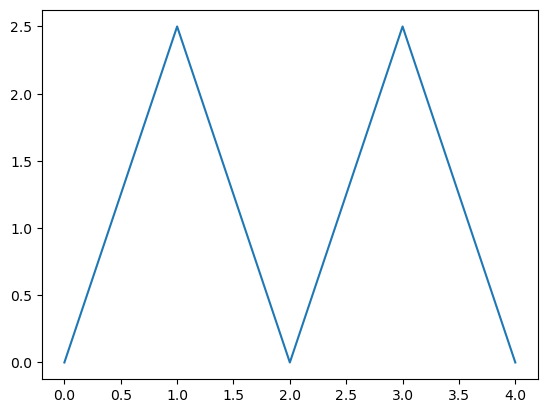

In [29]:
plt.plot(ttl[-5:])

In [30]:
doubled = (np.repeat((np.arange(65)).reshape(-1,1), repeats=2, axis=0).reshape(-1))

In [38]:
np.mean(doubled.reshape(-1,2), axis=1)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.])